### EE 347 Lab 1 Data Analysis

In [794]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# data import
all_data_dict = pd.read_excel("./ee347-lab1.xlsx", sheet_name=None)

### Part 1

In [795]:
# Graph data

df_p1 = all_data_dict["PART 1"]
# plt.plot(df_p1["SourceMeter (V)"], df_p1["SourceMeter (A"] * 1000, '.')
# plt.title(r"$I_D$ vs. $V_{DS}$")
# plt.ylabel(r"$I_{D}$ (mA)")
# plt.xlabel(r"$V_{DS}$ (V)")

(0.0, 35.705)

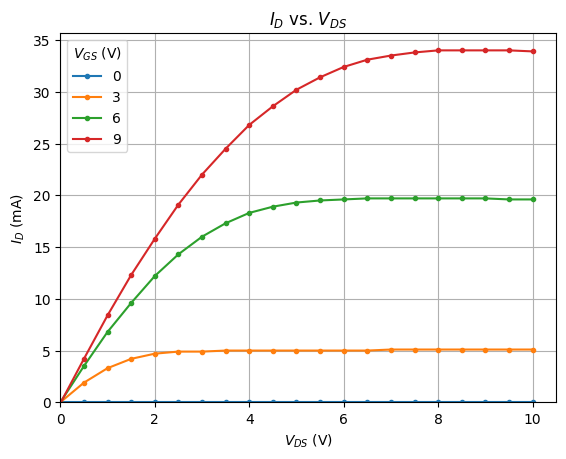

In [796]:
# Better graphing with groupby?
group_vgs = df_p1.groupby("Vgs")

for name, group in group_vgs:
    plt.plot(group["SourceMeter (V)"], group["SourceMeter (A"] * 1000, '.-', label=name)
plt.title(r"$I_D$ vs. $V_{DS}$")
plt.ylabel(r"$I_{D}$ (mA)")
plt.xlabel(r"$V_{DS}$ (V)")
plt.legend(title=r"$V_{GS}$ (V)")
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom=0)

In [827]:
# Extract NMOS parameters - KP (can't get VTO from this dataset)
VTO = 3
df_p1nz = df_p1[df_p1 != 0].dropna() # drop any rows with a 0

is_ohmic = lambda row, VTO: (row["Vgs"] - VTO) >= row["SourceMeter (V)"]
df_p1nz = df_p1nz[df_p1nz.apply(is_ohmic, axis=1, VTO=VTO)]


id = df_p1nz["SourceMeter (A"]
vgs = df_p1nz["Vgs"]
vds = df_p1nz["SourceMeter (V)"]

# for i in range(df_p1nz.shape[0]):
#     if (vgs[i] - VTO) > vds[i]:
#         df_p1nz.iloc[i]["kp"] = id[i] / (((vgs[i] - VTO) * vds[i]) - (0.5 * np.power(vds[i], 2)))
#     else:
#         df_p1nz[i]["kp"] = math.NaN

# wrong - can't use the triode equation when FET is in saturation
# for now, just ignore values of kp calculated with wrong equation
df_p1nz["kp"] = id / (((vgs - VTO) * vds) - (0.5 * np.power(vds, 2)))
df_p1nz

,SourceMeter (V),SourceMeter (A,Vgs,kp
43,0.5,0.0035,6.0,0.002545
44,1.0,0.0068,6.0,0.002720
45,1.5,0.0096,6.0,0.002844
46,2.0,0.0122,6.0,0.003050
47,2.5,0.0143,6.0,0.003269
48,3.0,0.0160,6.0,0.003556
64,0.5,0.0042,9.0,0.001461
65,1.0,0.0084,9.0,0.001527
66,1.5,0.0123,9.0,0.001562
67,2.0,0.0158,9.0,0.001580


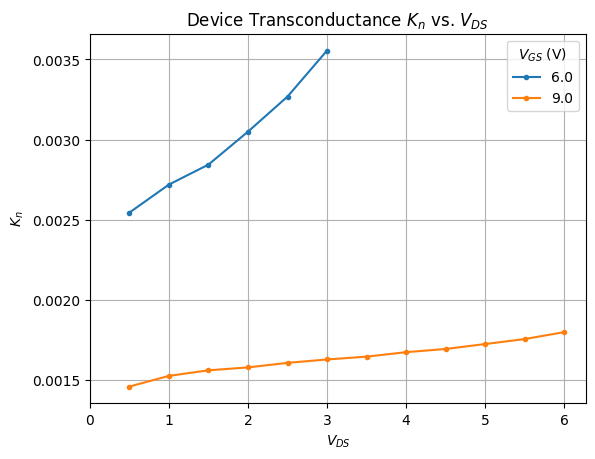

In [828]:

#df_p1nz = df_p1nz[np.isfinite(df_p1nz["kp"])]
# plt.hist(df_p1nz["kp"], bins=20) # histogram
p1nz_vgs_group = df_p1nz.groupby("Vgs") # group by Vgs

for name, group in p1nz_vgs_group:
    plt.plot(group["SourceMeter (V)"], group["kp"], '.-', label=name)
plt.legend(title=r"$V_{GS}$ (V)")
plt.xlabel(r"$V_{DS}$")
plt.ylabel(r"$K_n$")
plt.title(r"Device Transconductance $K_n$ vs. $V_{DS}$")
plt.xlim(left=0)
plt.grid()



In [829]:
KN = (p1nz_vgs_group.get_group(9))["kp"].mean()
p1nz_vgs_group["kp"].describe()


,count,mean,std,min,25%,50%,75%,max
Vgs,,,,,,,,
6.0,6.0,0.002997,0.000372,0.002545,0.002751,0.002947,0.003214,0.003556
9.0,12.0,0.001639,0.000098,0.001461,0.001575,0.001638,0.001703,0.001800


In [830]:
# HACKY - fix
# By inspection, the Vgs = 9 V dataset has the most stable results for KP.
# Since the triode equation was used for all calculations, only KP results for
# Vds = 7 V and below are valid.
# This code grabs only samples with Vgs = 9, Vds < 7 V, and calculates the mean KP.
# vgs_9 = p1nz_vgs_group.get_group(9.0)
# KN = vgs_9[vgs_9["SourceMeter (V)"] < 7].mean()["kp"]
# KN

#### Lambda - Channel Length Modulation Parameter 

In [831]:
# From KP, estimate lambda - channel length modulation parameter

# Get only rows that are in saturation - Vgs - Vt < Vds, and for whom Vgs is nonzero
is_sat = lambda x: ((x["Vgs"] - VTO) < x["SourceMeter (V)"]) and x["Vgs"] != 0

df_p1sat = df_p1[df_p1.apply(is_sat, axis=1)]
df_p1sat


,SourceMeter (V),SourceMeter (A,Vgs
22,0.5,0.0019,3
23,1.0,0.0033,3
24,1.5,0.0042,3
25,2.0,0.0047,3
26,2.5,0.0049,3
27,3.0,0.0049,3
28,3.5,0.0050,3
29,4.0,0.0050,3
30,4.5,0.0050,3
31,5.0,0.0050,3


In [832]:
p1sat_vgs_group = df_p1sat.groupby("Vgs")

In [833]:
# for name, group in p1sat_vgs_group:
#     plt.plot(group["SourceMeter (V)"], group["lambda"], '.-', label=name)
# plt.legend(title=r"$V_{GS}$ (V)")
# plt.xlabel(r"$V_{DS}$")
# plt.ylabel(r"$lambda$")
# plt.title(r"Measured Channel Length Modulation Parameter vs. $V_{DS}$")
# plt.xlim(left=0)
# plt.grid()

#### Channel Length Modulation - A Different Approach
Try finding $\lambda$ from $\frac{1}{V_A}$

Reference: https://engineering.purdue.edu/wcchew/ece255f17/ECE%20255%20f17%20latex%20pdf%20files/ece255LectureSep21.pdf

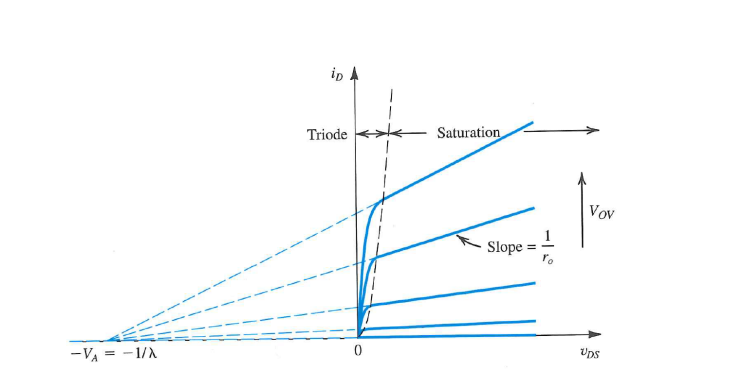

In [834]:
# p1sat_vgs_9 = p1sat_vgs_group.get_group(9)
# coeffs = np.polyfit(p1sat_vgs_9["SourceMeter (V)"], p1sat_vgs_9["SourceMeter (A"], 1)

# lambda_9 = coeffs[0] / p1sat_vgs_9["SourceMeter (A"]
# plt.plot(p1sat_vgs_9["SourceMeter (V)"], p1sat_vgs_9["SourceMeter (A"])
# plt.plot(p1sat_vgs_9["SourceMeter (V)"], lambda_9, '.')

# va = -coeffs[1] / coeffs[0] # early voltage
# x = np.linspace(va, 10, 200)
# plt.plot(x, np.polyval(coeffs,x))

# coeffs
# abs(1 / va)

Text(0, 0.5, '$I_D$')

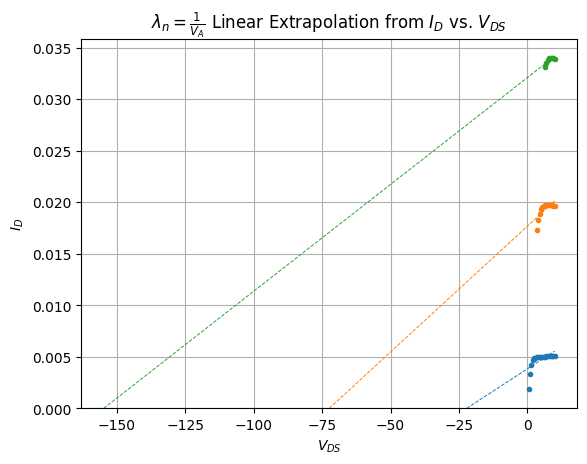

In [835]:
# Now do it for all saturated voltages
d_va = {}
d_lambda = {}
for name, group in p1sat_vgs_group: # iterate over Vgs
    coeffs = np.polyfit(group["SourceMeter (V)"], group["SourceMeter (A"], 1)
    xint = -coeffs[1] / coeffs[0] # negative of x-int of saturation trendline 
    va = -xint
    d_va[name] = va
    d_lambda[name] = 1 / va
    plt.plot(group["SourceMeter (V)"], group["SourceMeter (A"], '.', 
             label=name)
    
    # plotting
    color = plt.gca().lines[-1].get_color()
    x = np.linspace(xint, 10, 50)
    plt.plot(x, np.polyval(coeffs,x), '--',linewidth=0.7, color=color)
plt.grid()
plt.ylim(bottom=0)
plt.title(r"$\lambda_n = \frac{1}{V_A}$ Linear Extrapolation from $I_D$ vs. $V_{DS}$")
plt.xlabel(r"$V_{DS}$")
plt.ylabel(r"$I_D$")

    

In [836]:
print(d_lambda)

{3: 0.04514796971782526, 6: 0.013813701698711945, 9: 0.006457359162770072}


$\lambda_n$ Estimation, Manually estimate EOS

In [837]:
# Since the Vgs values in the dataset were estimated, manually estimate EOS and 
# improve linear fit by only using I-V points that are *clearly* in saturation
satvgs3 = (df_p1sat["Vgs"] == 3) & (df_p1sat["SourceMeter (V)"] >= 2.5)
satvgs6 = (df_p1sat["Vgs"] == 6) & (df_p1sat["SourceMeter (V)"] >= 4.5)
satvgs9 = (df_p1sat["Vgs"] == 9) & (df_p1sat["SourceMeter (V)"] >= 6.5)

df_p1satm = df_p1sat[satvgs3 | satvgs6 | satvgs9]
#df_p1satm

Text(0, 0.5, '$I_D$')

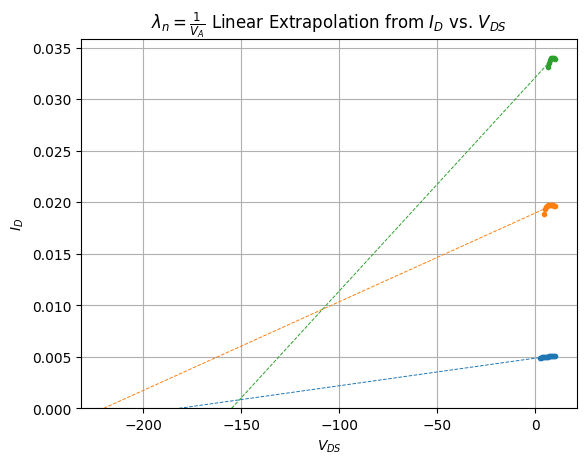

In [838]:
p1satm_vgs_group = df_p1satm.groupby("Vgs")
d_va = {}
d_lambda = {}

for name, group in p1satm_vgs_group: # iterate over Vgs
    coeffs = np.polyfit(group["SourceMeter (V)"], group["SourceMeter (A"], 1)
    xint = -coeffs[1] / coeffs[0] # negative of x-int of saturation trendline 
    va = -xint
    d_va[name] = va
    d_lambda[name] = 1 / va
    plt.plot(group["SourceMeter (V)"], group["SourceMeter (A"], '.', 
             label=name)
    
    # plotting
    last_color = plt.gca().lines[-1].get_color()
    x = np.linspace(xint, 10, 50)
    plt.plot(x, np.polyval(coeffs,x), '--',linewidth=0.7, color=last_color)
plt.grid()
plt.ylim(bottom=0)
plt.title(r"$\lambda_n = \frac{1}{V_A}$ Linear Extrapolation from $I_D$ vs. $V_{DS}$")
plt.xlabel(r"$V_{DS}$")
plt.ylabel(r"$I_D$")

In [839]:
d_lambda
np.average([val for _, val in d_lambda.items()])

0.005500887106453718

# Part 2 

(0.0, 20.5)

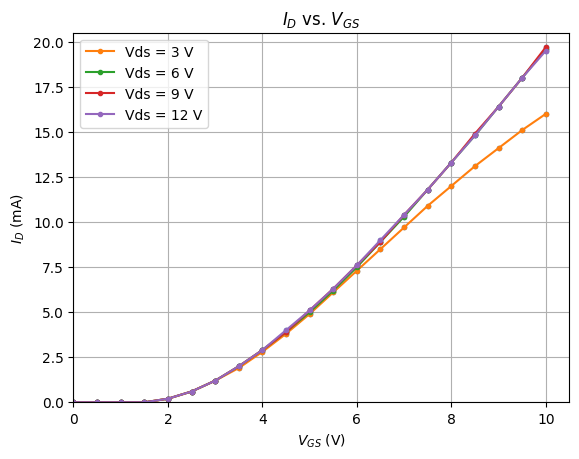

In [840]:
df_p2 = all_data_dict["PART 2"]
plt.plot(df_p2["Power Supply (V)"], df_p2["SourceMeter (A)"] * 1000, '.')
plt.title(r"$I_D$ vs. $V_{GS}$, $V_{DS}$ = 3,6,9,12 V")
plt.ylabel(r"$I_{D}$ (mA)")
plt.xlabel(r"$V_{GS}$ (V)")

for vds_val in df_p2["Vds"].unique():
    df_subset = df_p2[df_p2["Vds"] == vds_val]
    vgs = df_subset["Power Supply (V)"]
    id = df_subset["SourceMeter (A)"]
    plt.plot(vgs, id * 1000, '.-', label="Vds = {} V".format(vds_val))

plt.title(r"$I_D$ vs. $V_{GS}$")
plt.ylabel(r"$I_{D}$ (mA)")
plt.xlabel(r"$V_{GS}$ (V)")
plt.legend()
plt.grid()
plt.xlim([0, 10.5])
plt.ylim([0, 20.5])

In [841]:
df_p2.head()

,Power Supply (V),SourceMeter (A),Vds
0,0.0,0.0000,3
1,0.5,0.0000,3
2,1.0,0.0000,3
3,1.5,0.0000,3
4,2.0,0.0002,3


In [842]:
# Extract VTO and KP
#VTO = df_p2["Power Supply (V)"][(df_p2[df_p2["SourceMeter (A)"] > 0]).argmin()]

# determined by manual inspection of data - lowest Vgs for which id > 1 mA (arbitrary CC threshold)
VTO = 3 
df_p2 = df_p2[df_p2 != 0].dropna() # delete rows with elements equal to 0

is_ohmic = lambda row, VTO: (row["Power Supply (V)"] - VTO) > row["Vds"]
df_p2ohm = df_p2[df_p2.apply(is_ohmic, axis=1, VTO=VTO)]
df_p2ohm


,Power Supply (V),SourceMeter (A),Vds
13,6.5,0.0085,3
14,7.0,0.0097,3
15,7.5,0.0109,3
16,8.0,0.0120,3
17,8.5,0.0131,3
18,9.0,0.0141,3
19,9.5,0.0151,3
20,10.0,0.0160,3
40,9.5,0.0180,6
41,10.0,0.0196,6


,count,mean,std,min,25%,50%,75%,max
Vds,,,,,,,,
3,8.0,0.001147,0.000153,0.000970,0.001035,0.001117,0.001232,0.001417
6,2.0,0.000837,0.000029,0.000817,0.000827,0.000837,0.000847,0.000857


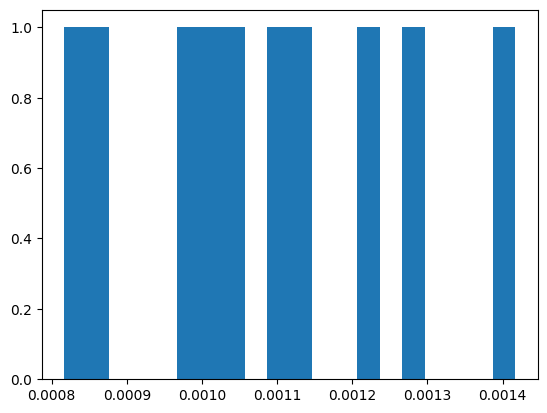

In [857]:
vgs = df_p2ohm["Power Supply (V)"]
id = df_p2ohm["SourceMeter (A)"]
vds = df_p2ohm["Vds"]

#df_p2["kp"] = (id + (0.5 * np.power(vds, 2))) / (vds * (vgs - VTO))
df_p2ohm.loc[:, "kp"] = id / (((vgs - VTO) * vds) - (0.5 * np.power(vds, 2)))

df_p2ohm = df_p2ohm[np.isfinite(df_p2ohm["kp"])]

plt.hist(df_p2ohm["kp"], bins=20) # histogram
df_p2ohm.groupby(["Vds"]).describe()["kp"] # get mean, grouping by Vds

#### $\lambda_n$ Estimation from Transfer Characteristics

In [858]:
# Renaming
df_p2 = df_p2.rename(columns={"Power Supply (V)": "Vgs", "SourceMeter (A)": "Id"})

# VTO = 3 V?
is_sat = lambda row: ((row["Vgs"] - VTO) < row["Vds"]) and row["Vgs"] >= VTO
df_p2sat = df_p2[df_p2.apply(is_sat, axis=1)]
df_p2sat



,Vgs,Id,Vds
6,3.0,0.0012,3
7,3.5,0.0019,3
8,4.0,0.0028,3
9,4.5,0.0038,3
10,5.0,0.0049,3
11,5.5,0.0061,3
27,3.0,0.0012,6
28,3.5,0.0020,6
29,4.0,0.0029,6
30,4.5,0.0039,6


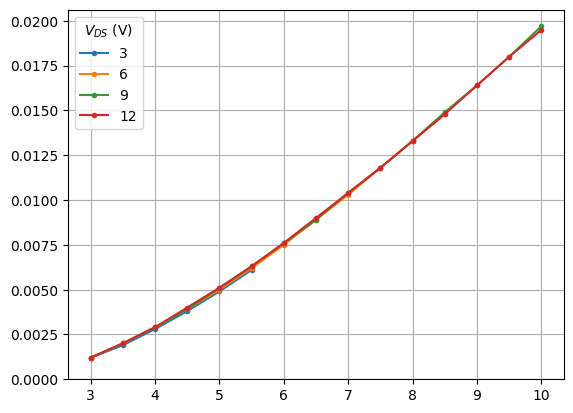

In [859]:
p2sat_vds_group = df_p2sat.groupby("Vds")

for name, group in p2sat_vds_group:
    # coeffs = np.polyfit(group["Vgs"], group["Id"], 1)
    # xint = -coeffs[1] / coeffs[0] # negative of x-int of saturation trendline 
    # va = -xint
    # d_va[name] = va
    # d_lambda[name] = 1 / va
    
    plt.plot(group["Vgs"], group["Id"], '.-', label=name)

    #x = np.linspace(xint, 10, 50)
    #plt.plot(x, np.polyval(coeffs,x), '--',linewidth=0.7)

plt.grid()
plt.ylim(bottom=0)
plt.legend(title=r"$V_{DS}$ (V)")

In [860]:
# calculate lambda directly from Vgs, Vds, Id
def calc_lambda(row, KN=1, VTO=3):
    id = row["Id"]
    vgs = row["Vgs"]
    vds = row["Vds"]
    vov = vgs - VTO

    return (((2 * id) / (KN * math.pow(vov, 2))) - 1) / vds

VTO = VTO
df_p2sat.loc[:,"lambda"] = df_p2sat.apply(calc_lambda, axis=1, VTO=3, KN=KN)

C:\Users\chris\AppData\Local\Temp\ipykernel_17180\221483172.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return (((2 * id) / (KN * math.pow(vov, 2))) - 1) / vds
C:\Users\chris\AppData\Local\Temp\ipykernel_17180\221483172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p2sat.loc[:,"lambda"] = df_p2sat.apply(calc_lambda, axis=1, VTO=3, KN=KN)


In [861]:
df_p2sat = df_p2sat[np.isfinite(df_p2sat["lambda"])]
df_p2sat["lambda"].describe()
#df_p2sat.loc[df_p2sat["lambda"].idxmax()]
# df_p2sat["lambda"].idxmax()
# df_p2sat


count    44.000000
mean      0.185161
std       0.504162
min      -0.067160
25%      -0.036056
50%       0.002679
75%       0.134171
max       2.758088
Name: lambda, dtype: float64

Text(0, 0.5, '$\\lambda_n$')

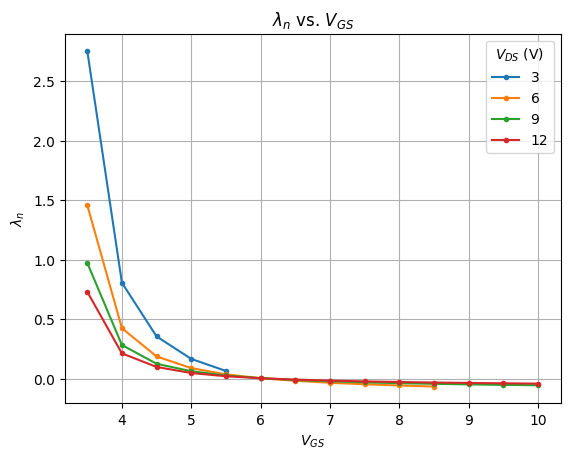

In [862]:
for name, group in p2sat_vds_group:  
    plt.plot(group["Vgs"], group["lambda"], '.-', label=name)

plt.grid()
#plt.ylim(bottom=0)
plt.legend(title=r"$V_{DS}$ (V)")
plt.title(r"$\lambda_n$ vs. $V_{GS}$")
plt.xlabel(r"$V_{GS}$")
plt.ylabel(r"$\lambda_n$")

### Part 3 

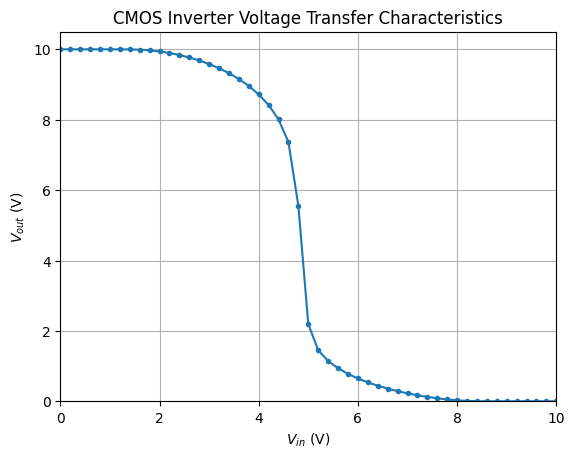

In [863]:
df_p3 = all_data_dict["PART 3"]
# clean up some naming
df_p3 = df_p3.rename(columns={"Power Supply (V)": "Vin", "Agilent Multimeter (V)": "Vout"})

plt.plot(df_p3["Vin"], df_p3["Vout"], '.-')
plt.ylabel(r"$V_{out}$ (V)")
plt.xlabel(r"$V_{in}$ (V)")
plt.title(r"CMOS Inverter Voltage Transfer Characteristics")
plt.xlim([0, 10])
plt.ylim([0, 10.5])
plt.grid()

#### Amplifier Gain 
Amplifier gain is the slope of the VTC in the narrow range of voltages near the switching voltage.